# Projeto - Aprendizagem Supervisionada

O dataset escolhido apresenta dados clínicos sobre pacientes, para previsão de ocorrência de doenças cardíacas.
A coluna alvo descreve se um paciente tem uma doença cardíaca ou não.
Vamos utilizar 3 algoritmos (kNN, Random Forest e Naive Bayes) para classificar a existência ou não de doença cardíaca em um paciente.

*Link do dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction*

Colunas, em que cada uma é um parâmetro:
* Age: idade do paciente (anos)
* Sex: sexo do paciente (M: Masculino; F: Feminino)
* ChestPainType: tipo de dor no peito (TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática)
* RestingBP: pressão arterial em repouso (mm Hg)
* Cholesterol: colesterol sérico (mm/dl)
* FastingBS: glicemia em jejum (1: se GlicemiaJejum > 120 mg/dl; 0: caso contrário)
* RestingECG: resultados do eletrocardiograma em repouso (Normal: Normal, ST: apresentando anormalidade na onda ST-T (inversões de onda T e/ou elevação ou depressão do ST > 0,05 mV), LVH: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos Estes' criteria)
* MaxHR: frequência cardíaca máxima alcançada (valor numérico entre 60 e 202)
* ExerciseAngina: angina induzida por exercício (Y: Sim; N: Não)
* Oldpeak: depressão de ST induzida por exercício (valor numérico medido em depressão). Também conhecido como "depressão de ST induzida por exercício". Um valor de oldpeak mais alto indica uma redução mais significativa no fluxo sanguíneo para o músculo cardíaco durante o exercício e pode sugerir um risco maior de DAC ou outras formas de doenças cardíacas.
* ST_Slope: a inclinação do segmento ST no pico do exercício (Up: ascendente; Flat: plano; Down: descendente)
* HeartDisease: classe de saída (1: tem doença cardíaca; 0: não tem doença cardíaca)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from tabulate import tabulate
from plotnine import *
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import plotly.express as px

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = '/content/gdrive/MyDrive/Project-ML' # Acessando a pasta do projeto

In [ ]:
%cd gdrive/MyDrive/Project-ML

/content/gdrive/MyDrive/Project-ML


In [ ]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content/gdrive/MyDrive/Project-ML. Or use the environment method.


In [ ]:
!unzip heart-failure-prediction.zip -d Dataset # Unzip dataset

Archive:  heart-failure-prediction.zip
replace Dataset/heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
%cd Dataset

/content/gdrive/MyDrive/Project-ML/Dataset


Visualizando os dados (uma amostra das primeiras 30 linhas):

In [ ]:
dataset = pd.read_csv("heart.csv")
dataset.head(30)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


### Analisando os dados

In [ ]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Text(0.5, 1.0, 'Número de pacientes com doenças cardíacas e pessoas saudáveis')

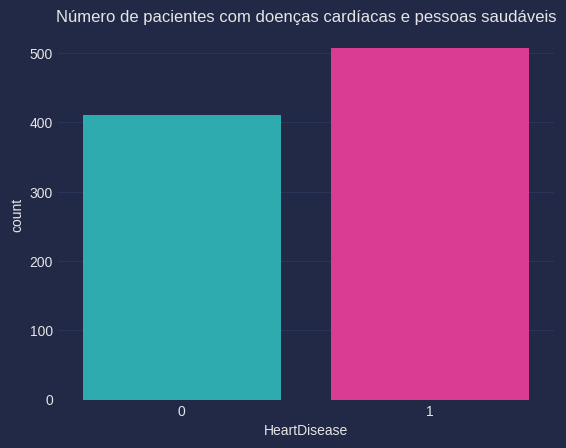

In [ ]:
sns.countplot(data=dataset,x='HeartDisease')

plt.title('Número de pacientes com doenças cardíacas e pessoas saudáveis')

Como podemos ver, nesse dataset, o número de pessoas com doenças cardíacas é maior do que o número de pessoas sem doenças cardíacas.

<Axes: xlabel='Age', ylabel='Count'>

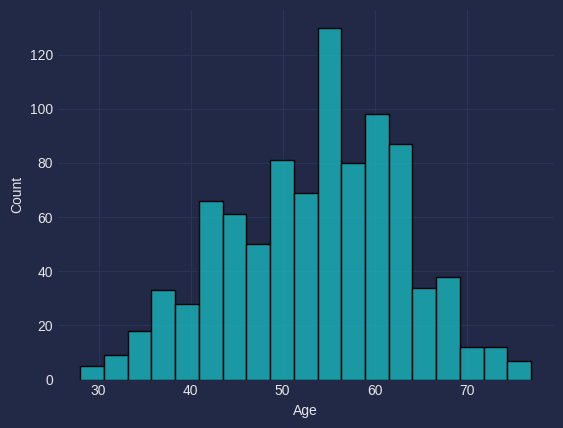

In [ ]:
sns.histplot(x= 'Age', data=dataset)

Aqui observamos a distribuição da idade das pessoas no dataset.

In [ ]:
px.histogram(dataset, x='RestingECG', color='HeartDisease', barmode='group', color_discrete_sequence=['#71AEC2 ','#C61DB4'],title='Relação do resultado do Eletrocardiograma com a existência de doença cardíaca')


É possível observar que a maioria das pessoas nesse dataset obteve o resultado "Normal" no Eletrocardiograma. Entretanto, nota-se que, entre as que obtiveram resultados "ST" ou "LVH", a diferença entre pessoas com e sem doenças cardíacas se torna mais discrepante.

In [ ]:
px.histogram(dataset, x='FastingBS', color='HeartDisease', barmode='group', color_discrete_sequence=['#71AEC2 ','#C61DB4'],title='Relação da glicemia em jejum com a existência de doença cardíaca')

Nota-se que, entre as pessoas com uma alta taxa de glicemia em jejum (>120, representados como "1" no eixo de x), é maior o número de pessoas com doenças cardíacas do que sem.

In [ ]:
fig=px.pie(dataset,values='HeartDisease',names='ChestPainType',color_discrete_sequence=px.colors.sequential.RdBu,title='A relação entre o tipo de dor no peito e a existência de doenças cardíacas')
fig.update_traces(textposition='inside',textinfo='percent+label')

Entre as pessoas que têm doenças cardíacas, o tipo de dor no peito mais comum é o "ASY".

### Pré processamento dos dados

In [ ]:
# Checando a quantidade de missing values em cada coluna
dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Não há missing values nas colunas!

In [ ]:
# Quantidade de linhas e colunas
dataset.shape

(918, 12)

In [ ]:
# Removendo valores duplicados
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.shape

(918, 12)

Não havia dados duplicados, pois tem a mesma quantidade de linhas e colunas após a chamada da função

Como também temos variáveis categóricas nesse dataset, utilizaremos o método "get_dummies" para transformar essas variáveis em variáveis numéricas

In [ ]:
x = pd.get_dummies(dataset.drop(columns="HeartDisease"), columns=["Sex","ST_Slope","RestingECG","ExerciseAngina","ChestPainType"], drop_first=False)
y = dataset["HeartDisease"]
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,172,0.0,0,1,0,0,1,0,1,0,1,0,0,1,0,0
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,0,1,0,0,1,1,0,0,1,0,0
3,48,138,214,0,108,1.5,1,0,0,1,0,0,1,0,0,1,1,0,0,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,1,0,0,1,0,1,0,0,0,0,1
914,68,144,193,1,141,3.4,0,1,0,1,0,0,1,0,1,0,1,0,0,0
915,57,130,131,0,115,1.2,0,1,0,1,0,0,1,0,0,1,1,0,0,0
916,57,130,236,0,174,0.0,1,0,0,1,0,1,0,0,1,0,0,1,0,0


In [ ]:
x.shape,y.shape

((918, 20), (918,))

In [ ]:
# Separando o dataset em dois conjuntos: de treino e de teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, shuffle=True, test_size=0.2)

In [ ]:
# Conferindo o tamanho dos dois conjuntos
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test:",y_test.shape)

x_train: (734, 20)
y_train: (734,)
x_test:  (184, 20)
y_test: (184,)


In [ ]:
# Normalizando os dados
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Classificadores

Para os classificadores que iremos utilizar a seguir, é necessário definir alguns parâmetros. Para isso, é possível usar a função GridSearchCV do Scikit-learn para testar várias combinações de valores dos hiperparâmetros. Após a validação cruzada, é possível acessar os melhores parâmetros através do atributo "best_params_" do objeto "GridSearchCV", o que ajuda a otimizar o modelo para novos dados. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Encontrando os melhores hiperparâmetros

models = [
    {
        "name": "Naive Bayes",
        "estimator": NB(),
        "hyperparameters": {
            "var_smoothing": [1e-9, 1e-10, 1e-11, 1e-12]
        }
    },
    {
        "name": "Random Forest",
        "estimator": RandomForestClassifier(),
        "hyperparameters": {
            "n_estimators": [100, 200, 300],
            "max_depth": [3, 5, 10],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    {
        "name": "K-Nearest Neighbors",
        "estimator": KNeighborsClassifier(),
        "hyperparameters": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
        }
    }
]

accuracies = []
train_accuracies = []
best_models = {}

for model in models:
  grid_search = GridSearchCV(
      estimator = model['estimator'],
      param_grid = model['hyperparameters'],
      scoring = 'accuracy',
      cv = 10
  )
  grid_search.fit(x_train, y_train)

  # Avaliando o desempenho do modelo
  best_model = grid_search.best_estimator_

  # Calculando a precisão para o conjunto de treino
  y_train_pred = best_model.predict(x_train)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  train_accuracies.append((model['name'], train_accuracy))

  # Calculando  a precisão para o conjunto de teste
  y_test_pred = best_model.predict(x_test)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  accuracies.append((model['name'], test_accuracy))

  best_models[model['name']] = best_model

  print(f"Melhores parâmetros para o {model['name']}: {grid_search.best_params_}")

Melhores parâmetros para o Naive Bayes: {'var_smoothing': 1e-09}
Melhores parâmetros para o Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Melhores parâmetros para o K-Nearest Neighbors: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}


Iremos utilizar os parâmetros obtidos acima em cada um dos classificadores, e também testar o resultado com os parâmetros que não foram selecionados.

### **Naive Bayes**

In [ ]:
# Utilizando os melhores parâmetros para o Naive Bayes
NB_model = NB(
    var_smoothing=1e-09
)

NB_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Calculando a precisão
y_pred_train = NB_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
y_pred_test = NB_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_test)

# Output
table_nb = []
table_nb.append(["Naive Bayes", accuracy, train_accuracy])
print(tabulate(table_nb, headers=['Model', 'Test Accuracy', 'Train Accuracy']))

Model          Test Accuracy    Train Accuracy
-----------  ---------------  ----------------
Naive Bayes         0.831522          0.871935


Como a distribuição dos dados se aproxima de uma distribuição Gaussiana, utilizamos o GaussianNB

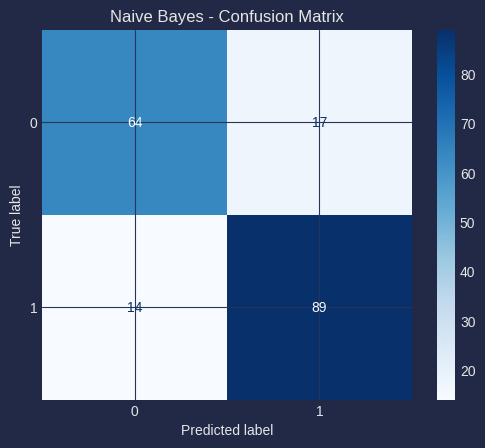

In [ ]:
# Matriz de Confusão
disp = ConfusionMatrixDisplay.from_estimator(NB_model, x_test, y_test, cmap='Blues')
disp.ax_.set_title('Naive Bayes - Confusion Matrix')
plt.show()

In [ ]:
print("Naive Bayes")
print(classification_report(y_test, NB_model.predict(x_test)))

Naive Bayes
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        81
           1       0.84      0.86      0.85       103

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



**Executando o modelo com outros parâmetros:**



In [ ]:
NB_model = NB(
    var_smoothing=1e-10
)

NB_model.fit(x_train, y_train)

# Calculando a precisão
y_pred_train = NB_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
y_pred_test = NB_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_test)

# Output
table_nb = []
table_nb.append(["Naive Bayes", accuracy, train_accuracy])
print("Para var_smoothing=1e-10:")
print(tabulate(table_nb, headers=['Model', 'Test Accuracy', 'Train Accuracy']))

Para var_smoothing=1e-10:
Model          Test Accuracy    Train Accuracy
-----------  ---------------  ----------------
Naive Bayes         0.831522          0.871935


In [ ]:
NB_model = NB(
    var_smoothing=1e-12
)

NB_model.fit(x_train, y_train)

# Calculando a precisão
y_pred_train = NB_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
y_pred_test = NB_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_test)

# Output
table_nb = []
table_nb.append(["Naive Bayes", accuracy, train_accuracy])
print("Para var_smoothing=1e-12:")
print(tabulate(table_nb, headers=['Model', 'Test Accuracy', 'Train Accuracy']))

Para var_smoothing=1e-12:
Model          Test Accuracy    Train Accuracy
-----------  ---------------  ----------------
Naive Bayes         0.831522          0.871935


Observa-se que a precisão não sofreu alterações. Assumimos que a precisão do modelo não é sensível a pequenas alterações no "var_smoothing"

### **Random Forest**

In [ ]:
# Utilizando os melhores parâmetros para o Random Forest
RandomForest_model = RandomForestClassifier(
    max_depth = 10,
    min_samples_leaf = 1,
    min_samples_split=5,
    n_estimators=200
)

In [ ]:
RandomForest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200)

In [ ]:
# Calculando a precisão
y_pred_train = RandomForest_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
y_pred_test = RandomForest_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_test)

# Output
table_rf = []
table_rf.append(['Random Forest', accuracy, train_accuracy])
print(tabulate(table_rf, headers=['Model', 'Test Accuracy', 'Train Accuracy']))

Model            Test Accuracy    Train Accuracy
-------------  ---------------  ----------------
Random Forest         0.847826          0.959128


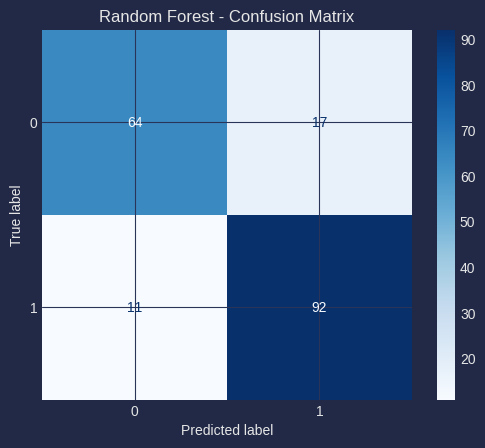

In [ ]:
# Matriz de Confusão
disp = ConfusionMatrixDisplay.from_estimator(RandomForest_model, x_test, y_test, cmap='Blues')
disp.ax_.set_title('Random Forest - Confusion Matrix')
plt.show()

In [ ]:
print("Random Forest")
print(classification_report(y_test, RandomForest_model.predict(x_test)))

Random Forest
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        81
           1       0.84      0.89      0.87       103

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



Overfitting

Se aumentarmos a profundidade máxima da árvore, aumentarmos o número de árvores na floresta e diminuirmos o número de amostras necessárias para dividir um nó interno, observamos que possivelmente há um overfitting. O overfitting ocorre quando um modelo é ajustado excessivamente aos dados de treinamento e, consequentemente, acontece uma redução na capacidade do modelo de generalizar para novos dados. 

In [ ]:
# Utilizando outrps parâmetros para o Random Forest
RandomForest_model = RandomForestClassifier(
    max_depth = 20, # Aumentando a profundidade máxima da árvore
    min_samples_leaf = 1,
    min_samples_split=2, # Diminuindo o número mínimo de amostras para dividir um nó interno
    n_estimators=1000 # Aumentando o número de árvores na floresta
)
RandomForest_model.fit(x_train, y_train)
# Calculando a precisão
y_pred_train = RandomForest_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
y_pred_test = RandomForest_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_test)

# Output
table_rf = []
table_rf.append(['Random Forest', accuracy, train_accuracy])
print(tabulate(table_rf, headers=['Model', 'Test Accuracy', 'Train Accuracy']))


Model            Test Accuracy    Train Accuracy
-------------  ---------------  ----------------
Random Forest          0.86413                 1


### **K-nearest neighbors**

In [ ]:
# Utilizando os melhores parâmetros para o KNN
KNN_model = KNeighborsClassifier(
    algorithm = 'auto',
    n_neighbors = 7,
    weights = 'distance'
)

In [ ]:
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [ ]:
# Calculando a precisão
y_pred_train = KNN_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
y_pred_test = KNN_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_test)

# Output
table_knn = []
table_knn.append(['KNN', accuracy, train_accuracy])
print(tabulate(table_knn, headers=['Model', 'Test Accuracy', 'Train Accuracy']))

Model      Test Accuracy    Train Accuracy
-------  ---------------  ----------------
KNN             0.842391                 1


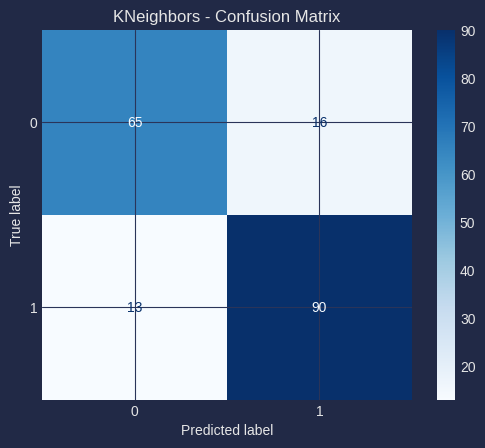

In [ ]:
# Matriz de Confusão
disp = ConfusionMatrixDisplay.from_estimator(KNN_model, x_test, y_test, cmap='Blues')
disp.ax_.set_title('KNeighbors - Confusion Matrix')
plt.show()

Nota-se que, possivelmente, houve um overfitting para o modelo com os parâmetros que foram selecionados. Por essa razão, iremos utilizar outros parâmetros para evitar o overfitting.

**Executando o modelo com outros parâmetros:**


In [ ]:
KNN_model = KNeighborsClassifier(
    algorithm = 'auto',
    n_neighbors = 5,
    weights = 'uniform'
)

In [ ]:
KNN_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# Calculando a precisão
y_pred_train = KNN_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
y_pred_test = KNN_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_test)

# Output
table_knn = []
table_knn.append(['KNN', accuracy, train_accuracy])
print(tabulate(table_knn, headers=['Model', 'Test Accuracy', 'Train Accuracy']))

Model      Test Accuracy    Train Accuracy
-------  ---------------  ----------------
KNN             0.836957          0.888283


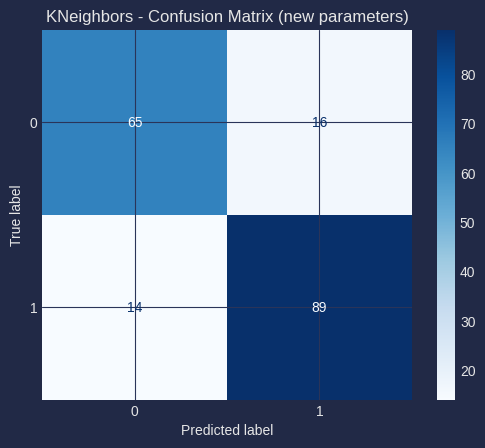

In [ ]:
# Matriz de Confusão
disp = ConfusionMatrixDisplay.from_estimator(KNN_model, x_test, y_test, cmap='Blues')
disp.ax_.set_title('KNeighbors - Confusion Matrix (new parameters)')
plt.show()

In [ ]:
print("KNN Model")
print(classification_report(y_test, KNN_model.predict(x_test)))

KNN Model
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        81
           1       0.85      0.86      0.86       103

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

